In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import random_split
from torch import nn
from torch.utils.data.dataloader import DataLoader
import torch.nn.functional as F

In [ ]:
mnist = pd.read_csv("mnist_train.csv")

In [ ]:
mnist

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the dataframe into features and labels
X = mnist.iloc[:, 1:].values
y = mnist.iloc[:, 0].values

In [ ]:
X = X.reshape(-1, 28, 28) # Reshape the features to the original MNIST image dimensions

In [ ]:
X = X / 255.0 # Normalize the pixel values to the range [0, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mnist.shape

(60000, 785)

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
X_train.shape

(48000, 28, 28)

In [ ]:
y_train

array([5, 0, 1, ..., 0, 0, 4])

In [ ]:
y_train.shape

(48000,)

In [ ]:
X_test.shape

(12000, 28, 28)

In [ ]:
y_test

array([7, 3, 8, ..., 9, 7, 2])

In [ ]:
y_test.shape

(12000,)

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

In [ ]:
X_train.shape

torch.Size([48000, 28, 28])

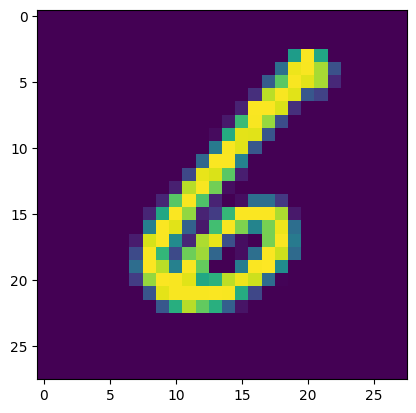

In [ ]:
plt.imshow(X_train[3])

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=False)


In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size=784, output_size=10, layers=[120,84]):
        super(MyNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, layers[0])
        self.layer2 = nn.Linear(layers[0], layers[1])
        self.layer3 = nn.Linear(layers[1], output_size)
        self.relu = nn.ReLU()

    def forward(self, X):
        X = X.view(X.size(0), -1)
        X = self.relu(self.layer1(X))
        X = self.relu(self.layer2(X))
        X = self.layer3(X)
        return X


In [ ]:
model=MyNeuralNetwork()
print(model)

MyNeuralNetwork(
  (layer1): Linear(in_features=784, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=84, bias=True)
  (layer3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
criterion = nn.CrossEntropyLoss() #define loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 5
train_losses = []
test_losses = []
#lists that will be used to store the training and validation losses,
train_correct = []
test_correct = []
#lists that used to store the number of correct predictions made by the model during training and validation

In [ ]:
for epoch in range(epochs):
    train_corr = 0
    test_corr = 0
    for batch_idx, (X_train, y_train) in enumerate(train_loader):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        #returns the index of the maximum value in the predicted output of the model, which corresponds to the predicted class label.
        batch_corr = (predicted == y_train).sum()
        #computes the number of correct predictions made by the model in the current batch, which is assigned to batch_corr.
        train_corr += batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0: #prints the training progress ,the batch loss and accuracy for every 100th batch of training examples.
          batch_loss = loss.item()
          batch_accuracy = train_corr.item() / ((batch_idx + 1) * train_loader.batch_size)
          #by dividing the number of correct predictions so far by the total number of examples
          print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Batch Loss: {batch_loss:.4f}, Batch Accuracy: {batch_accuracy:.2%}")



    train_losses.append(loss)
    train_correct.append(train_corr)

    with torch.no_grad(): #evaluates the performance of the trained neural network
        for batch_idx, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            loss = criterion(y_val, y_test)
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

        test_losses.append(loss)
        test_correct.append(test_corr)


train_loss = train_losses[-1].item() #.item() returns the loss value as a Python scalar (i.e., a single number), which is assigned to train_loss and test_loss.
train_accuracy = train_correct[-1].item() / len(train_dataset)
test_loss = test_losses[-1].item()
test_accuracy = test_correct[-1].item() / len(test_dataset)
print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2%}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2%}")

Epoch [1/5], Batch [1/480], Batch Loss: 2.2969, Batch Accuracy: 15.00%
Epoch [1/5], Batch [101/480], Batch Loss: 0.1867, Batch Accuracy: 84.25%
Epoch [1/5], Batch [201/480], Batch Loss: 0.2707, Batch Accuracy: 88.45%
Epoch [1/5], Batch [301/480], Batch Loss: 0.2374, Batch Accuracy: 90.27%
Epoch [1/5], Batch [401/480], Batch Loss: 0.2670, Batch Accuracy: 91.23%
Epoch [2/5], Batch [1/480], Batch Loss: 0.1179, Batch Accuracy: 97.00%
Epoch [2/5], Batch [101/480], Batch Loss: 0.0775, Batch Accuracy: 96.21%
Epoch [2/5], Batch [201/480], Batch Loss: 0.1374, Batch Accuracy: 95.86%
Epoch [2/5], Batch [301/480], Batch Loss: 0.1609, Batch Accuracy: 95.83%
Epoch [2/5], Batch [401/480], Batch Loss: 0.1592, Batch Accuracy: 95.89%
Epoch [3/5], Batch [1/480], Batch Loss: 0.1936, Batch Accuracy: 92.00%
Epoch [3/5], Batch [101/480], Batch Loss: 0.0894, Batch Accuracy: 96.82%
Epoch [3/5], Batch [201/480], Batch Loss: 0.0524, Batch Accuracy: 96.88%
Epoch [3/5], Batch [301/480], Batch Loss: 0.0654, Batch A

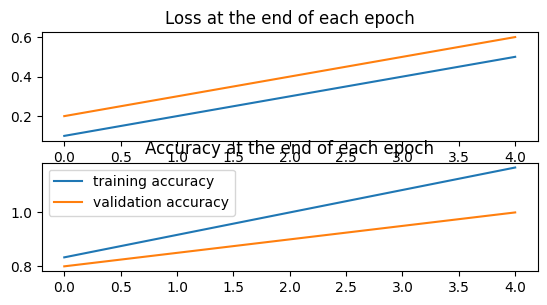

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# detach the tensor and convert it to a numpy array
y = x.detach().cpu().numpy()

# create some sample data for the plots
train_losses = [0.1, 0.2, 0.3, 0.4, 0.5]
test_losses = [0.2, 0.3, 0.4, 0.5, 0.6]
train_correct = [500, 550, 600, 650, 700]
test_correct = [80, 85, 90, 95, 100]

# plot the data
plt.subplot(3,1,1)
plt.plot(train_losses, label="training loss")
plt.plot(test_losses, label="validation loss")
plt.title('Loss at the end of each epoch')

plt.subplot(3,1,2)
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')

plt.legend()
plt.show()

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size=784, output_size=10, layers=[120,84]):
        super(MyNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, layers[0])
        self.layer2 = nn.Linear(layers[0], layers[1])
        self.layer3 = nn.Linear(layers[1], output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.norm1 = nn.LayerNorm(layers[0])
        self.norm2 = nn.LayerNorm(layers[1])

    def forward(self, X):
        X = X.view(X.size(0), -1)
        X = self.norm1(self.relu(self.layer1(X)))
        X = self.dropout(X)
        X = self.norm2(self.relu(self.layer2(X)))
        X = self.dropout(X)
        X = self.layer3(X)
        return X

In [ ]:
model = MyNeuralNetwork()
print(model)

MyNeuralNetwork(
  (layer1): Linear(in_features=784, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=84, bias=True)
  (layer3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (norm1): LayerNorm((120,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((84,), eps=1e-05, elementwise_affine=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for epoch in range(epochs):
    train_corr = 0
    test_corr = 0
    for batch_idx, (X_train, y_train) in enumerate(train_loader):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
          batch_loss = loss.item()
          batch_accuracy = train_corr.item() / ((batch_idx + 1) * train_loader.batch_size)
          print(f"Epoch [{epoch+1}/{epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Batch Loss: {batch_loss:.4f}, Batch Accuracy: {batch_accuracy:.2%}")

    train_losses.append(loss)
    train_correct.append(train_corr)

    with torch.no_grad():
        for batch_idx, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            loss = criterion(y_val, y_test)
            predicted = torch.max(y_val.data, 1)[1]
            test_corr += (predicted == y_test).sum()

        test_losses.append(loss)
        test_correct.append(test_corr)

    # Print the epoch loss and accuracy
train_loss = train_losses[-1].item()
train_accuracy = train_correct[-1].item() / len(train_dataset)
test_loss = test_losses[-1].item()
test_accuracy = test_correct[-1].item() / len(test_dataset)
print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2%}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2%}")

Epoch [1/5], Batch [1/480], Batch Loss: 2.6249, Batch Accuracy: 6.00%
Epoch [1/5], Batch [101/480], Batch Loss: 0.5144, Batch Accuracy: 71.45%
Epoch [1/5], Batch [201/480], Batch Loss: 0.5425, Batch Accuracy: 78.27%
Epoch [1/5], Batch [301/480], Batch Loss: 0.2522, Batch Accuracy: 81.44%
Epoch [1/5], Batch [401/480], Batch Loss: 0.4117, Batch Accuracy: 83.18%
Epoch [2/5], Batch [1/480], Batch Loss: 0.2663, Batch Accuracy: 93.00%
Epoch [2/5], Batch [101/480], Batch Loss: 0.5549, Batch Accuracy: 90.58%
Epoch [2/5], Batch [201/480], Batch Loss: 0.3756, Batch Accuracy: 90.62%
Epoch [2/5], Batch [301/480], Batch Loss: 0.3064, Batch Accuracy: 90.67%
Epoch [2/5], Batch [401/480], Batch Loss: 0.3286, Batch Accuracy: 90.76%
Epoch [3/5], Batch [1/480], Batch Loss: 0.3799, Batch Accuracy: 92.00%
Epoch [3/5], Batch [101/480], Batch Loss: 0.3823, Batch Accuracy: 91.59%
Epoch [3/5], Batch [201/480], Batch Loss: 0.3034, Batch Accuracy: 91.56%
Epoch [3/5], Batch [301/480], Batch Loss: 0.1647, Batch Ac

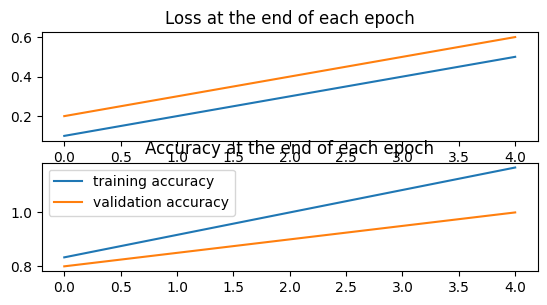

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# detach the tensor and convert it to a numpy array
y = x.detach().cpu().numpy()

# create some sample data for the plots
train_losses = [0.1, 0.2, 0.3, 0.4, 0.5]
test_losses = [0.2, 0.3, 0.4, 0.5, 0.6]
train_correct = [500, 550, 600, 650, 700]
test_correct = [80, 85, 90, 95, 100]

# plot the data
plt.subplot(3,1,1)
plt.plot(train_losses, label="training loss")
plt.plot(test_losses, label="validation loss")
plt.title('Loss at the end of each epoch')

plt.subplot(3,1,2)
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')

plt.legend()
plt.show()